In [1]:
import mpld3
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.decomposition import PCA
from astropy.table import Table

In [2]:
# Create a dataset of all the lightcurves in s0017/0000/0000/0561
sample = []
labels = []
for path in glob('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/*/*.fits'):
    print(path)
    fits_file = fits.open(path)
    sample.append(fits_file[1].data['SAP_FLUX'])
    labels.append(fits_file[0].header['OBJECT'])

/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5261/hlsp_qlp_tess_ffi_s0017-0000000005615261_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4864/hlsp_qlp_tess_ffi_s0017-0000000005614864_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4557/hlsp_qlp_tess_ffi_s0017-0000000005614557_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4201/hlsp_qlp_tess_ffi_s0017-0000000005614201_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5021/hlsp_qlp_tess_ffi_s0017-0000000005615021_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4382/hlsp_qlp_tess_ffi_s0017-0000000005614382_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4777/hlsp_qlp_tess_ffi_s0017-0000000005614777_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4986/hlsp_qlp_tess_ffi_s0017-0000000005614986_tess_v01_llc.fits
/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4670/hlsp_q

In [3]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_sample = imp_mean.fit_transform(sample)

In [4]:
sample

[array([0.9992868, 0.9996567, 0.9989093, ..., 1.0248593, 1.020782 ,
        1.0145972], dtype=float32),
 array([1.0015326, 1.001331 , 1.0009866, ..., 1.0153021, 1.0192069,
        1.0160922], dtype=float32),
 array([0.99580944, 0.99946463, 1.0032929 , ..., 1.5475637 , 1.628972  ,
        1.4854399 ], dtype=float32),
 array([0.9994509 , 1.0009161 , 1.0012814 , ..., 1.0007656 , 1.000232  ,
        0.99923414], dtype=float32),
 array([0.99692273, 0.99764466, 0.99922436, ..., 1.6216929 , 1.474438  ,
        1.3225752 ], dtype=float32),
 array([1.0017685 , 1.0016477 , 1.0019066 , ..., 1.0019876 , 0.99978215,
        1.0017595 ], dtype=float32),
 array([1.0001864 , 0.998861  , 0.996804  , ..., 0.9482295 , 0.96141154,
        0.9649173 ], dtype=float32),
 array([1.0003786, 1.0007437, 1.0014327, ..., 1.0095588, 1.005047 ,
        1.0015595], dtype=float32),
 array([1.0045041 , 1.0006659 , 0.9980202 , ..., 0.92420906, 0.9264111 ,
        0.95906425], dtype=float32),
 array([1.0016078, 1.0002853

In [5]:
pca = PCA(n_components=2)
sample_after_pca = pca.fit(imputed_sample).transform(imputed_sample)
sample_after_pca

array([[-4.27503451e+01,  3.51499293e-02],
       [-4.27550321e+01, -4.10200741e+01],
       [-3.55102368e+01, -4.03844352e-01],
       [-3.58870501e-01,  4.75851851e-02],
       [-3.84387418e+01, -8.40241666e-01],
       [-4.48444874e+01,  8.38052465e-02],
       [-4.17626519e+01, -9.97874551e-02],
       [-4.40905341e+01,  6.16762735e-02],
       [-3.85352722e+01, -4.15349573e-02],
       [-4.00826976e+01,  2.78700912e-04],
       [-3.60067496e+01,  5.45729606e-03],
       [-3.96792917e+01,  5.65650487e-04],
       [-3.58936525e+01, -7.70876413e-02],
       [ 4.53975900e-02,  2.26303498e-01],
       [-3.65748416e+01,  4.53061324e-01],
       [-1.27009055e-01, -2.15806509e+01],
       [-2.58118718e-01,  3.20818920e-01],
       [-2.73027075e-01,  8.60783371e-02],
       [-1.07024052e-01,  2.24844885e-01],
       [-3.83962359e+01, -1.52581589e-01],
       [-3.10186434e+01,  4.34129520e-01],
       [-4.08980757e+01, -1.11476203e+01],
       [-2.08058253e-01,  2.70723089e-01],
       [-4.

In [6]:
pca.explained_variance_ratio_

array([0.91077396, 0.03593542])

In [7]:

fig = plt.figure()
scatter = plt.scatter(
    sample_after_pca[:, 0], sample_after_pca[:, 1], s=5, label=labels
)

plt.title("PCA of lightcurves in s0017/0000/0000/0561")

tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

Outliers are:
* (bottom right) TIC 5615395 https://exofop.ipac.caltech.edu/tess/target.php?id=5615395
* (top left) TIC 5615165 https://exofop.ipac.caltech.edu/tess/target.php?id=5615165

In [28]:
# TIC 5615395
right_outlier = fits.open('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5395/hlsp_qlp_tess_ffi_s0017-0000000005615395_tess_v01_llc.fits')
right_dat = Table.read(right_outlier)
right_pd = right_dat.to_pandas()
right_pd

,TIME,CADENCENO,SAP_FLUX,KSPSAP_FLUX,KSPSAP_FLUX_ERR,QUALITY,ORBITID,SAP_X,SAP_Y,SAP_BKG,SAP_BKG_ERR,KSPSAP_FLUX_SML,KSPSAP_FLUX_LAG
0,1764.703488,25787,0.993515,0.975339,0.009337,4096,41,2084.590088,1128.899170,746.169983,1252.390015,0.985553,9.661676e-01
1,1764.724322,25788,1.032666,1.014915,0.009337,4096,41,2084.586914,1128.888794,1573.530029,1196.239990,1.007614,1.020390e+00
2,1764.745156,25789,1.028881,1.012275,0.009337,4096,41,2084.588379,1128.888672,1352.689941,1179.310059,1.007703,1.016984e+00
3,1764.765991,25790,1.023372,1.007875,0.009337,4096,41,2084.586914,1128.884521,1739.280029,1223.969971,1.004773,1.008938e+00
4,1764.786825,25791,1.015991,1.001562,0.009337,4096,41,2084.590820,1128.886963,486.980011,918.859985,0.999526,1.002613e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,1789.599769,26982,NaN,NaN,0.009337,4096,42,NaN,NaN,NaN,NaN,NaN,NaN
1126,1789.620603,26983,NaN,NaN,0.009337,4096,42,NaN,NaN,NaN,NaN,NaN,NaN
1127,1789.641436,26984,0.909167,0.026822,0.009337,4096,42,2084.769775,1128.755737,236220.265625,193093.375000,0.001265,1.659818e-13
1128,1789.662270,26985,0.946722,0.999034,0.009337,4096,42,2084.744873,1128.734985,183212.515625,141824.703125,0.000916,2.920755e-14


In [9]:
# TIC 5615165
top_outlier = fits.open('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/5165/hlsp_qlp_tess_ffi_s0017-0000000005615165_tess_v01_llc.fits')
dat = Table.read(top_outlier)
dat.to_pandas()

,TIME,CADENCENO,SAP_FLUX,KSPSAP_FLUX,KSPSAP_FLUX_ERR,QUALITY,ORBITID,SAP_X,SAP_Y,SAP_BKG,SAP_BKG_ERR,KSPSAP_FLUX_SML,KSPSAP_FLUX_LAG
0,1764.703509,25787,0.999194,1.000928,0.001576,4096,41,2049.083496,1015.959412,7.570000,527.770020,1.001449,1.002035
1,1764.724344,25788,0.997579,0.999348,0.001576,4096,41,2049.080566,1015.956360,209.940002,467.029999,1.000354,0.999730
2,1764.745178,25789,0.997476,0.999284,0.001576,4096,41,2049.083008,1015.953430,99.339996,398.100006,1.000492,1.000008
3,1764.766012,25790,0.998736,1.000589,0.001576,4096,41,2049.085449,1015.951416,-51.880001,492.390015,1.001022,1.001043
4,1764.786846,25791,0.996386,0.998276,0.001576,4096,41,2049.086426,1015.950378,234.860001,441.640015,0.999504,0.997733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,1789.599782,26982,NaN,NaN,0.001576,4096,42,NaN,NaN,NaN,NaN,NaN,NaN
1126,1789.620615,26983,NaN,NaN,0.001576,4096,42,NaN,NaN,NaN,NaN,NaN,NaN
1127,1789.641449,26984,0.997934,1.001398,0.001576,4096,42,2049.191162,1015.629944,41109.050781,16757.740234,1.000597,1.000399
1128,1789.662282,26985,0.978224,0.982306,0.001576,4096,42,2049.179199,1015.641418,21409.550781,10090.219727,0.991647,0.973239


(0.8, 1.2)

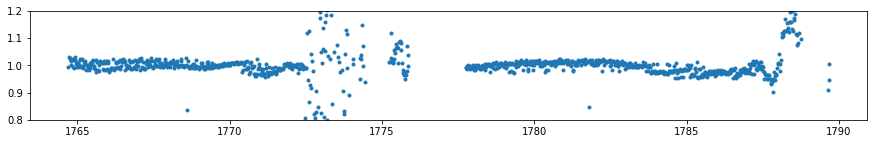

In [26]:

plt.figure(figsize=(15,2))
sf = right_dat['SAP_FLUX'].tolist()
t = right_dat['TIME'].tolist()

sf.pop(552)
t.pop(552)

plt.plot(t, sf, '.')
plt.ylim(0.8, 1.2)

# Some weirdness in the first 4-5 days

In [23]:
x = right_dat['SAP_FLUX'][np.logical_not(np.isnan(right_dat['SAP_FLUX']))]
np.max(x)
np.nanargmax(right_dat['SAP_FLUX'])


552

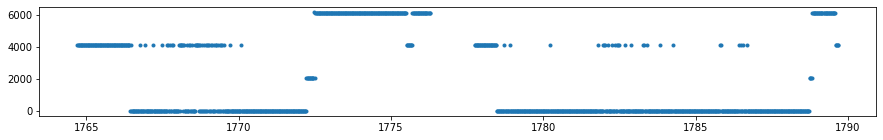

In [29]:
plt.figure(figsize=(15,2))
sf = right_dat['QUALITY'].tolist()
t = right_dat['TIME'].tolist()

sf.pop(552)
t.pop(552)

plt.plot(t, sf, '.')

# Maybe toss the data points where quality flag is ~6000
# Spot check other lightcurves to see if there's weirdness around 2048 - ~6000

(0.8, 1.2)

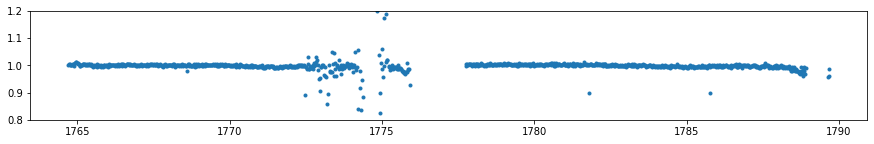

In [33]:
rando = fits.open('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/0561/4972/hlsp_qlp_tess_ffi_s0017-0000000005614972_tess_v01_llc.fits')
dat = Table.read(rando)
pd = dat.to_pandas()

plt.figure(figsize=(15,2))
sf = pd['SAP_FLUX'].tolist()
t = pd['TIME'].tolist()

plt.plot(t, sf, '.')
plt.ylim(0.8, 1.2)